In [ ]:
import numpy as np
# Powerful n-dimensional arrays. Numerical computing tools. Interoperable:

import pandas as pd
# python powerfull library used for data manipulating and data analysis:

import matplotlib.pyplot as plt
# mayplotlib is a ploting library we can use this to make awesome graphs:

import seaborn as sns
# seaborn also a ploting library we can use this to make awesome graphs:

%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the inline:

In [ ]:
# Linear Regression Model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics

In [ ]:
# Load data:

data = pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [ ]:
# showing first five rows of data:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
## first we can chek our data info using info function:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# first we check our columns name using df.columns function:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

in our data set no any kind of missing values . but one thing is noteable that in our dataset
<font color='red'>"Serial No" column is useless</font> this column get us error in model development session because here we want 
to predict the <font color='green'>"Chance of admit"</font> . and "chance of admit" not depend on your serial no so this column is useless for us.
first we can remove this column using <font color='sky blue'>df.drop()</font> so lets GO

**now we can select <font color='green'>'Serial No.'</font> column and remove this from our dataset.**

In [ ]:
data.drop('Serial No.',axis=1,inplace=True)

# axis = 1 because of its by default axis=0 . axis  = 0 means row wise , axis = 1 means column wise 
# so here we want to remove a column so we uset axis = 1 .

# inplace = True . mean we want this changing in our main dataset -

**now you can see <font color=red>'Serial No.'</font> removed from our dataset.**

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
data.describe()

# using this function we can simply find [count,mean,std,min,25%,50%,75%,max]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
data.corr()

# dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe 
# it is ignored.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


now we can find correlations between x and y variabls . in x variabls we have independent variables and in y variable we have dependent variables. we can change this corr table into a graph usng <font color = 'green'>seaborn heatmap</font> through for simply understanding.

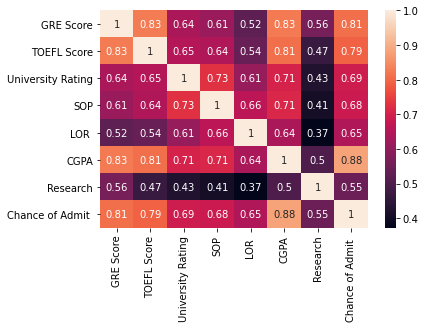

In [ ]:
 sns.heatmap(data.corr(),annot=True)

# now you can simple check out correlation between x and y variables:

<b>as u can see <font color='red'>['CGPA','GRE Score','TOEFL Score']</font> are strongly correlated with dependent variable - '<font color='green'>Chance of Admit '</green>

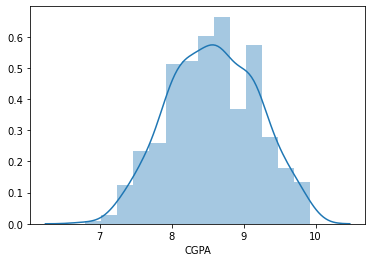

In [ ]:
sns.distplot(data['CGPA'])

<h2>CGPA <font color='green'>VS</font> Chance of Admit<h2>

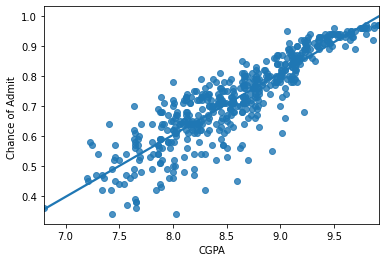

In [ ]:
sns.regplot(x='CGPA',y='Chance of Admit ',data=data,ci=None)

<h2>GRE Score <font color='green'>VS</font> Chance of Admit<h2>

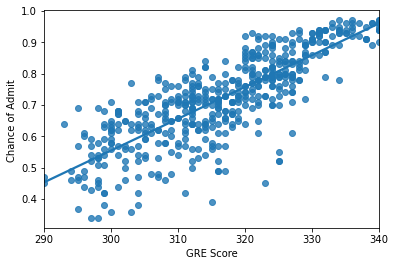

In [ ]:
sns.regplot(x='GRE Score',y='Chance of Admit ',data=data,ci=None)

<h2>TOEFL Score <font color='green'>VS</font> Chance of Admit<h2>

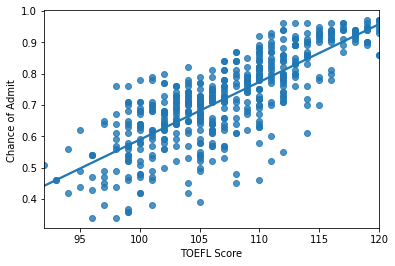

In [ ]:
sns.regplot(x='TOEFL Score',y='Chance of Admit ',data=data,ci=None)

now we can use these columns in model for <font color="green">Chance of Admit</font> prediction

now we can split our variables in 2 variables x and y :<br>
+ <font color='green'> x = independent variables
+ y = dependent variables</font><br>

independent variables are  <font color='green'>[CGPA,GRE Score,TOEFL Score]</font> we put these variables in X = [CGPA,GRE Score,TOEFL Score]<br>
dependent variable are <font color='green'> [Chance of Admit]</font> now we go to predict this variabl so y = [Chance of Admit]

In [ ]:
x = data[['CGPA','GRE Score','TOEFL Score']]

In [ ]:
y = data[['Chance of Admit ']]

<font color = 'red'>from sklearn.linear_model import LinearRegression<br>
from sklearn.model_selection import train_test_split<br>
import random<br></font>

these libraries we can use for create our model . so we already import these libraries . lets start working on model.<br>

In [ ]:
# Split data for test and train the model.
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=.20)

In [ ]:
# x shape
x.shape

(500, 3)

In [ ]:
# x_train shape 80% of data from x - 20% other data for test
x_train.shape

(400, 3)

In [ ]:
# x_train first five rows:
x_train.head()

,CGPA,GRE Score,TOEFL Score
107,9.46,338,117
336,8.79,319,110
71,9.76,336,112
474,7.95,308,105
6,8.20,321,109


In [ ]:
#object
linreg = LinearRegression()

In [ ]:
# fiting our data for training
linreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# our model is ready to predict y.
y_predict = linreg.predict(x_test)

In [ ]:
# our model prediction
y_predict[:10]

array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329],
       [0.68293116],
       [0.55296602],
       [0.7583334 ]])

First we can compare y_predict and y_test 

In [ ]:
# y predict
y_predict[:10]

array([[0.62802152],
       [0.83209435],
       [0.79119818],
       [0.85046086],
       [0.60222891],
       [0.66888863],
       [0.55297329],
       [0.68293116],
       [0.55296602],
       [0.7583334 ]])

In [ ]:
# y test
y_test[:10]

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68
15,0.54
316,0.54
489,0.65
159,0.52
153,0.79


from sklearn import metrics<br>
we can use this for find evaluating the performance

In [ ]:
# from sklearn import metrics
# already imported

In [ ]:
metrics.mean_absolute_error(y_test,y_predict)

0.046886213593857244